# <span  style="color:green">EMOTION BAG OF VISUAL WORD</span>
# KAGGLE FER2013 FACIAL EXPRESSION

## 1.Setup Environments

In [1]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt, numpy as np
import sys, os

project_dir = '../sources' # contain code of project
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

In [2]:
from EmotionBoW.envs import check_tensorflow_environment, choose_keras_environment
check_tensorflow_environment()
choose_keras_environment(gpus = ["-1"], keras_backend = "tensorflow", verbose = 1)

TensorFlow Version: 1.4.0
Default GPU Device: /device:GPU:0
Environment GPUs:
+ Choose GPUs:  -1
+ Keras backend:  tensorflow


## 2. Setup Project

In [3]:
import os

PROJECT_NAME      = 'EMOTION_BAG_OF_VISUAL_WORDS_KAGGLE_FER2013'
RESULT_NAME       = 'MAIN'
DELETE_OLD_RESULT = False

# project configuration
data_dir          = os.path.abspath('../data/') # contain results, reports, checkpoints
dataset_dir       = os.path.join(data_dir, 'dataset','fer2013')
dataset_db_file   = os.path.join(data_dir, 'fer2013.hdf5')

# results of training
result_dir        = os.path.join(data_dir, "results", RESULT_NAME)
train_dir         = os.path.join(result_dir, 'train')

# DELOY DATASET
DATA_ROOT_DIR          = os.path.abspath('../data')
DATA_ZIP_FILE          = os.path.join(DATA_ROOT_DIR, "fer2013.tar.gz")
DATA_ZIP_EXTRACT_DIR   = os.path.join(DATA_ROOT_DIR, "dataset")

DATASET_FILE           = os.path.join(DATA_ZIP_EXTRACT_DIR, 'fer2013','fer2013.csv')
DATASET_DIR            = os.path.join(DATA_ZIP_EXTRACT_DIR, 'fer2013')
DATASET_DB_FILE        = os.path.join(DATA_ROOT_DIR, 'fer2013.h5')

In [4]:
from EmotionBoW.fer2013 import Fer2013Dataset

In [5]:
%%time
ds = Fer2013Dataset(data = None, dataset_zip_file = DATA_ZIP_FILE, dataset_zip_extract_dir = DATA_ZIP_EXTRACT_DIR, 
                                   dataset_file = DATASET_FILE, dataset_dir  = DATASET_DIR,
                                   dataset_db_file = DATASET_DB_FILE)

100%|█████████████████████████████████████████████████████████████| 92.0M/92.0M [00:08<00:00, 12.0MB/s]

  0%|                                                                      | 0.00/7.01k [00:00<?, ?B/s]

100%|█████████████████████████████████████████████████████████████| 7.01k/7.01k [00:00<00:00, 1.43MB/s]
96461936it [00:03, 23971554.11it/s]                                                                    

+ D:\DNTAI\Programs\Python\BagOfVisualWordPrj\data\dataset/fer2013
fer2013.bib
fer2013.csv
README



100%|███████████████████████████████████████████████████████████| 35887/35887 [01:28<00:00, 407.59it/s]


+ Dataset Directory:
fer2013.bib
fer2013.csv
PrivateTest
PublicTest
README
Training


100%|████████████████████████████████████████████████████████████| 3589/3589 [00:01<00:00, 2027.69it/s]


Wall time: 2min 20s


## 3. Data Explorer

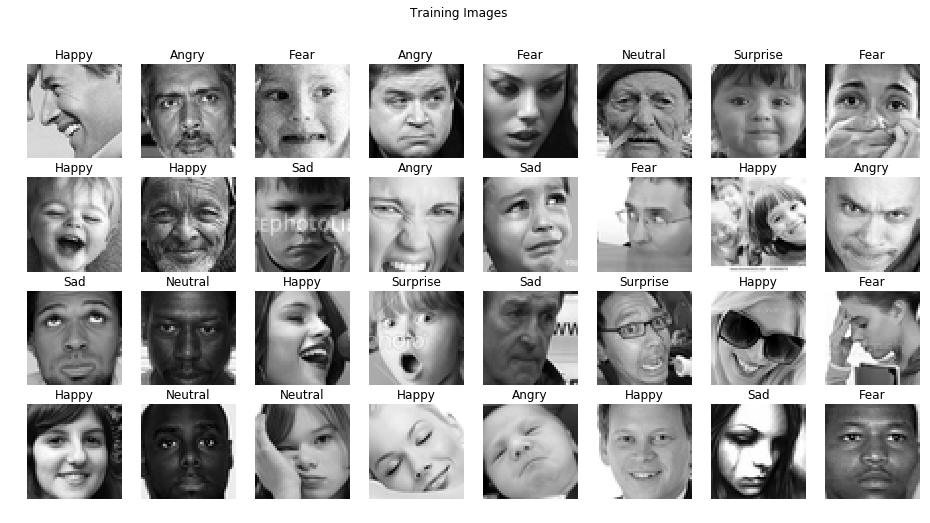

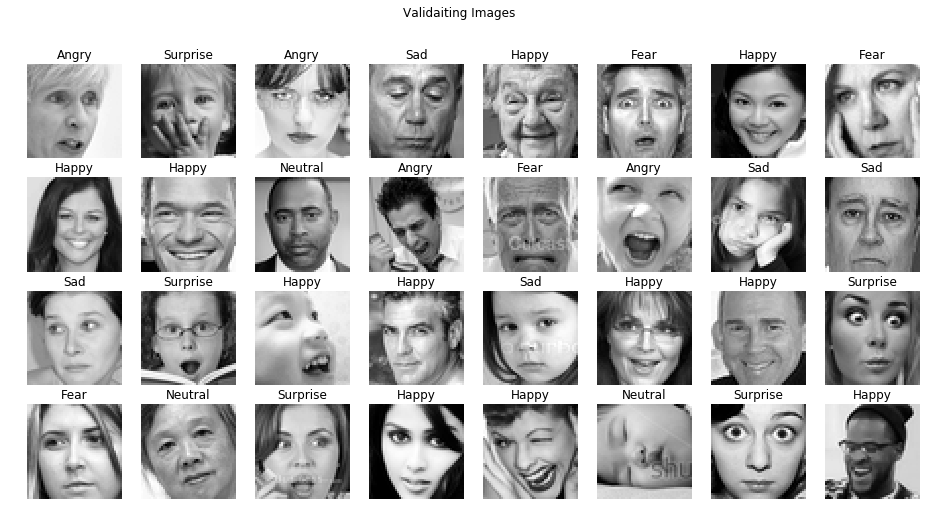

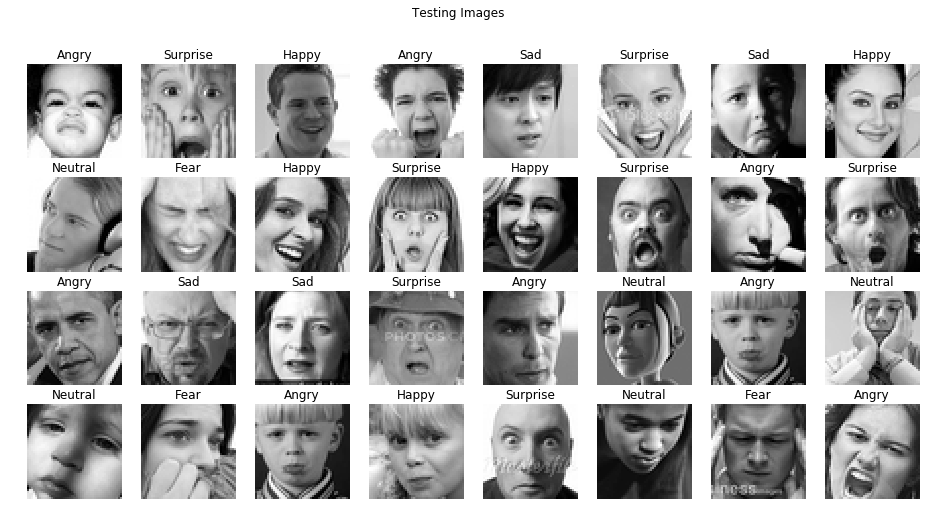

In [6]:
ds.view_images(ds.train_images, ds.train_label_keys, title = "Training Images", save_path=os.path.join(result_dir, 'training_images.png'))
ds.view_images(ds.valid_images, ds.valid_label_keys, title = "Validaiting Images", save_path=os.path.join(result_dir, 'validating_images.png'))
ds.view_images(ds.test_images , ds.test_label_keys , title = "Testing Images", save_path=os.path.join(result_dir, 'testing_images.png'))

Number of images in the training dataset:	 28709
Number of images in the public dataset:		  3589
Number of images in the private dataset:	  3589
Image information: 48 x 48 x 1


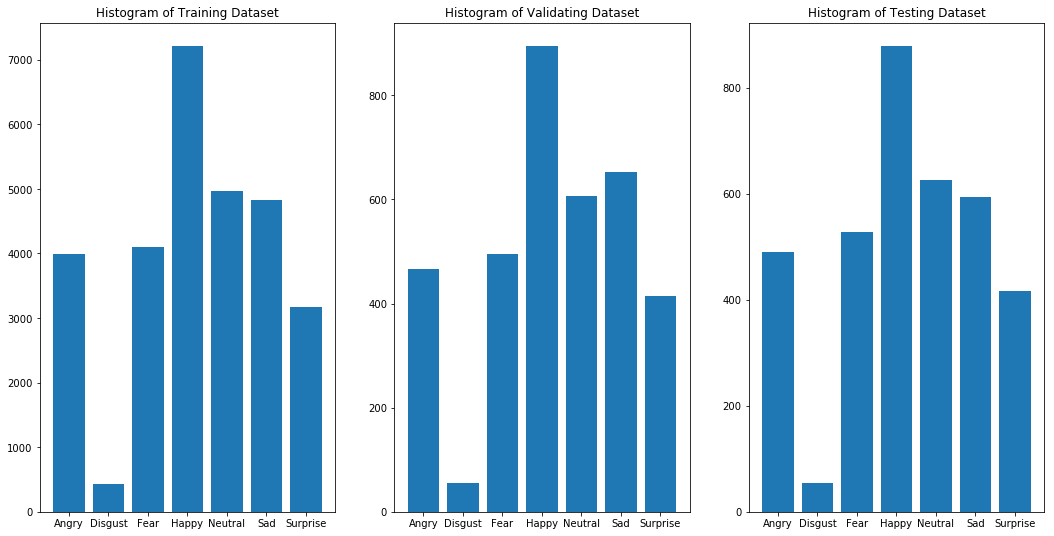

In [7]:
ds.view_summary(save_path=os.path.join(result_dir, 'histogram_images.png'))

## 4. Training

In [8]:
from EmotionBoW.bow import BoWDetection

In [9]:
bow = BoWDetection(ds.train_images, ds.train_label_keys, cache_dir = train_dir, prefix = 'sift_')

In [10]:
%%time
bow.build_descriptor()

100%|███████████████████████████████████████████████████████████| 28709/28709 [00:52<00:00, 547.11it/s]


Dump keypoints:  True
Dump descriptors:  True
Dump masks:  True
Total images: 28693
Wall time: 58.2 s


In [11]:
%%time
bow.build_local_patches()

100%|█████████████████████████████████████████████████████████| 28693/28693 [00:00<00:00, 94075.02it/s]


Total local patches in dictionary: 685225
Wall time: 2.89 s


In [12]:
%%time
bow.build_codewords()

Init 1/3 with method: k-means++
Inertia for init 1/3: 584561453.109375
Init 2/3 with method: k-means++
Inertia for init 2/3: 586729730.984375
Init 3/3 with method: k-means++
Inertia for init 3/3: 589824186.984375
Minibatch iteration 1/17200: mean batch inertia: 76184.057691, ewa inertia: 76184.057691 
Minibatch iteration 2/17200: mean batch inertia: 74332.976773, ewa inertia: 76162.446358 
Minibatch iteration 3/17200: mean batch inertia: 74018.658348, ewa inertia: 76137.417676 
Minibatch iteration 4/17200: mean batch inertia: 72648.574613, ewa inertia: 76096.685502 
Minibatch iteration 5/17200: mean batch inertia: 72822.059781, ewa inertia: 76058.454311 
Minibatch iteration 6/17200: mean batch inertia: 71078.224590, ewa inertia: 76000.310228 
Minibatch iteration 7/17200: mean batch inertia: 71406.643371, ewa inertia: 75946.679258 
Minibatch iteration 8/17200: mean batch inertia: 70887.820484, ewa inertia: 75887.617182 
Minibatch iteration 9/17200: mean batch inertia: 70569.194645, ewa 

In [13]:
%%time
bow.build_histogram_train()

Dump mega histogram finished!
Dump norm mega histogram finished!
Dump scale transform finished!
Wall time: 11 s


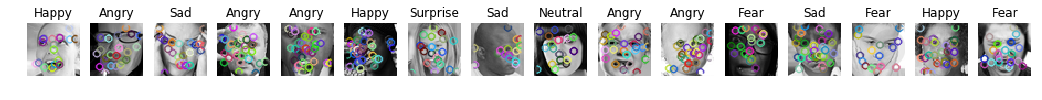

In [14]:
bow.view_descriptor(n_len = 16, labels = ds.labels)

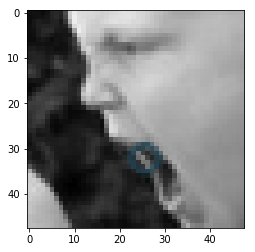


+ Keypoint:
angle: 279.0783996582031
class_id: -1
octave (image scale where feature is strongest): 2490879
pt(x,y): (13.895265579223633, 32.433631896972656)
response: 0.014104265719652176
size: 1.8589750528335571

+ Descriptor:


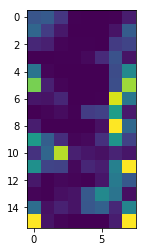

In [15]:
bow.explain_keypoint(image_idx = 11, key_idx = 10)

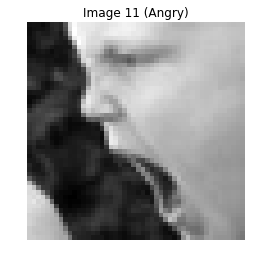

In [16]:
bow.view_image(11, ds.labels)

Histogram of Image 11 based on codewords:  [ 0.  0.  0. ...,  0.  0.  0.]
Normalize histogram of Image 11 based on codewords:  [-0.0919257  -0.06240067 -0.07722223 ..., -0.04539259 -0.07441142
 -0.06723304]


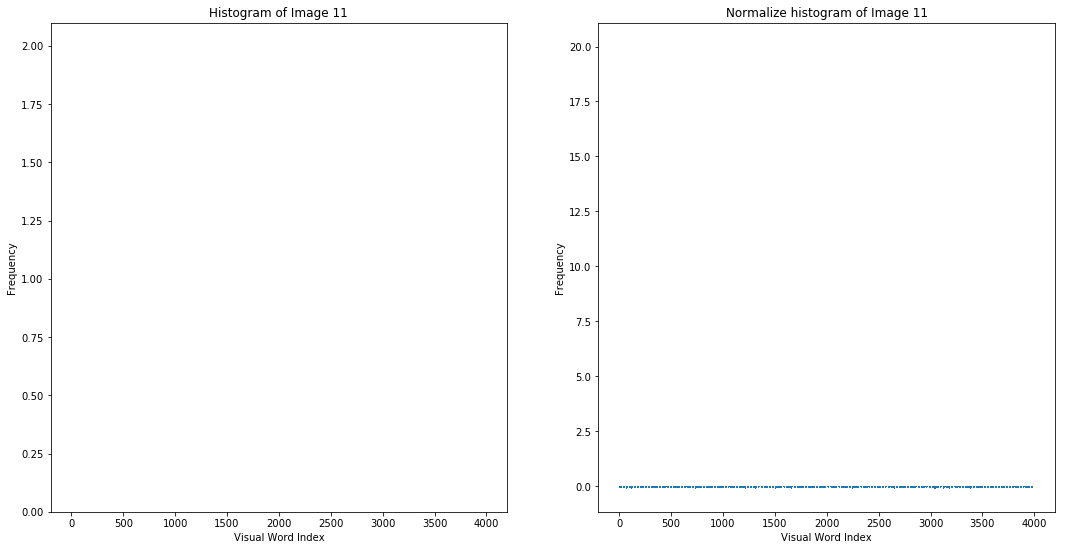

In [17]:
bow.view_hist(11, ds.labels)

Histogram of Codewords:  [ 259.  117.  174. ...,   59.  158.  133.]
Normalize histogram of Codewords:  [ -2.86336233e-11  -5.16804516e-11   3.22583071e-11 ...,  -1.37063277e-11
  -6.29174490e-11   2.67499356e-11]


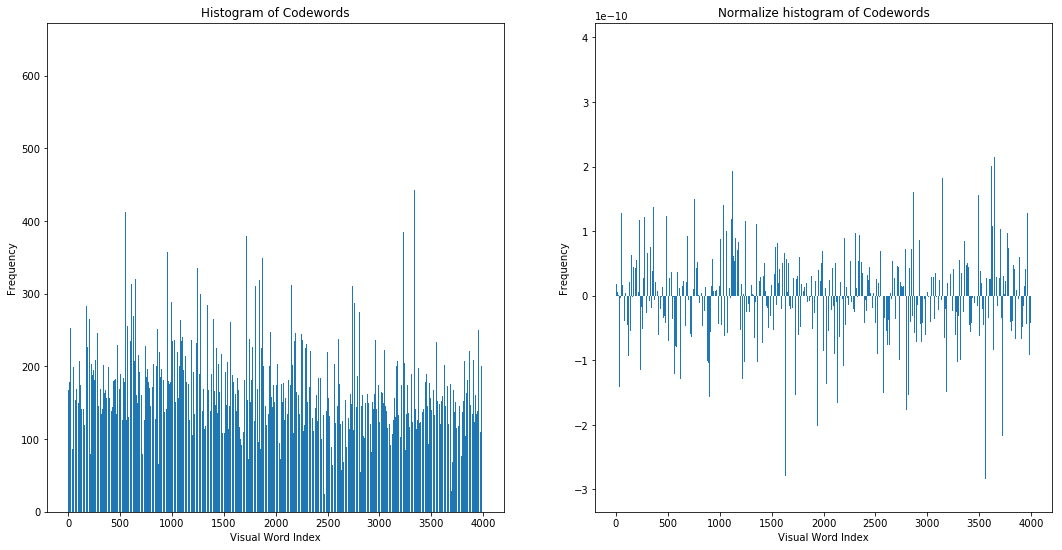

In [18]:
bow.view_hist_codewords()

## 5. Train

In [19]:
%%time
# Training SVM
bow.train()

Training SVM
Total training images: 28693
Train labels: [0 0 0 ..., 6 6 6]
Training completed
Dump classifier finished!
Wall time: 2h 9min 28s


## 6. Predict

In [12]:
from EmotionBoW.bow_eval import BoWDetection as BoWDetectionEval

In [13]:
bowPredictor = BoWDetectionEval(cache_dir = train_dir, prefix = 'sift_')

Load kmeans cluster finished!
Load scale transform finished!
Load classifier finished!
Load completed!


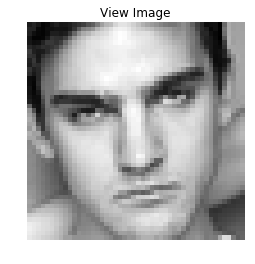

Image local patches:  (23, 128)
[[   0.    1.    3. ...,    0.    0.    0.]
 [   0.    0.    0. ...,   25.   27.   13.]
 [  53.   97.    5. ...,    1.    1.    9.]
 ..., 
 [   0.    0.    0. ...,    1.    7.    8.]
 [   0.    0.    0. ...,    0.    0.    1.]
 [   5.   64.  103. ...,    4.    6.    4.]]
23 codewords: 
[3921 2731  138  410 1060 2013 1885 2369 1787 3017  141  478  224 3207 1976
 3592 3816  862 2288  591 2381 2070  874]
Histogram Model: (1, 4000) [[ 0.  0.  0. ...,  0.  0.  0.]]
Normal Histogram Model: (1, 4000) [[-0.0919257  -0.06240067 -0.07722223 ..., -0.04539259 -0.07441142
  -0.06723304]]


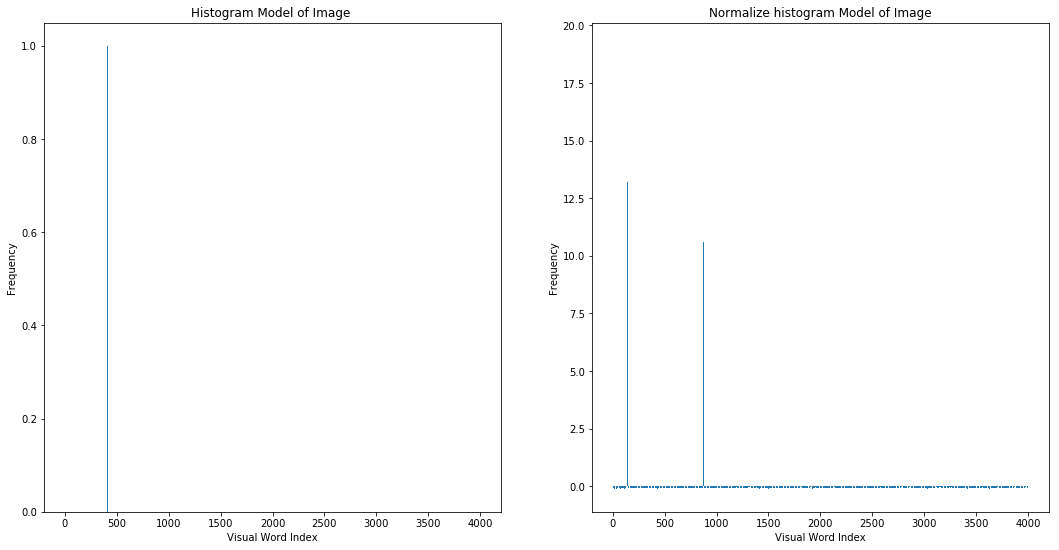

Predict label:  4  -  Neutral
Wall time: 25.6 s


In [14]:
%%time
idx = 10
predict_label = bowPredictor.predict(ds.valid_images[idx], ds.labels)

In [15]:
print('True label: ', ds.valid_label_names[idx])

True label:  Angry


## 7. Evaluate

In [16]:
%%time
y_valid_pred = bowPredictor.evaluate(ds.valid_images)

Wall time: 7min 46s


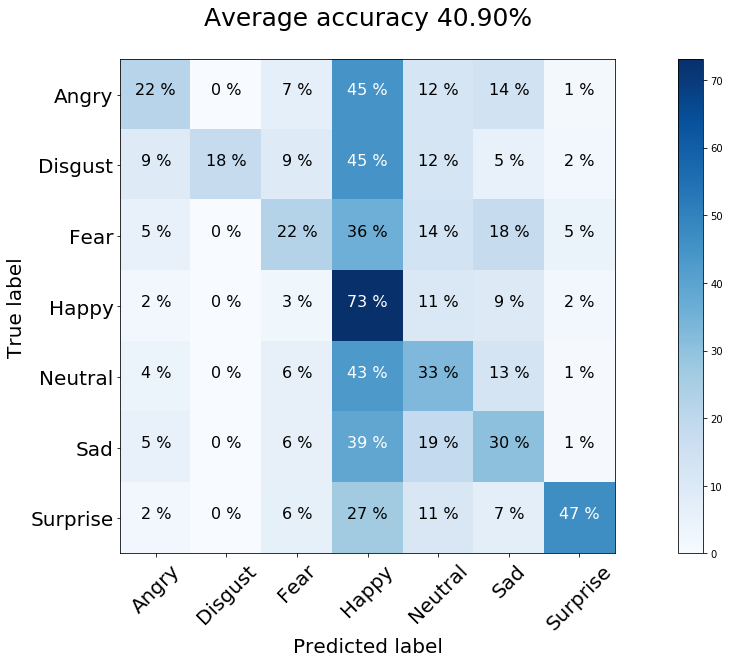

In [19]:
bowPredictor.show_confusion_matrix(ds.valid_label_keys, y_valid_pred, ds.labels)